# K-Means Clustering

In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import (KNeighborsClassifier,
                               NeighborhoodComponentsAnalysis)
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

from pandas import read_csv
file = 'Avocado.csv'

In [2]:
data_raw = read_csv(file)
data_raw.head(3)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


In [3]:
y_col = 'Total Bags'; y = data_raw[y_col].values
x_col = 'Total Volume'; x = data_raw[x_col].values
c_map = 'Small Bags'
data_s = data_raw[[x_col, y_col]].values
data_c = data_raw[c_map].values

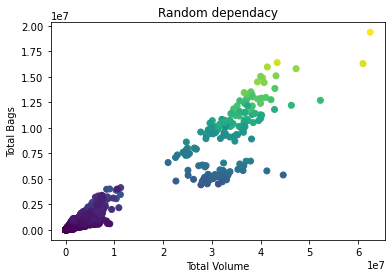

In [4]:
plt.scatter(data_s[:,0],data_s[:,1], c = data_c , cmap='viridis')
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.title('Random dependacy')
points = data_s

## Define the number of clusters

We need to define the number of clusters. We do this with the elbow method and as we see from the diagram below, the appropriate number of clusters is 3. 

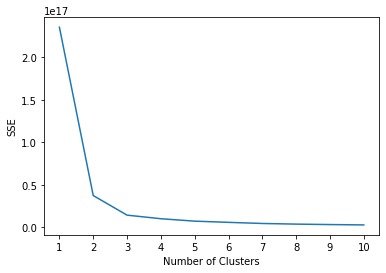

In [5]:
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)#, **kmeans_kwargs)
    kmeans.fit(points)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [6]:
points = data_s
kmeans = KMeans(n_clusters=3)
kmeans.fit(points)
y_km = kmeans.fit_predict(points)

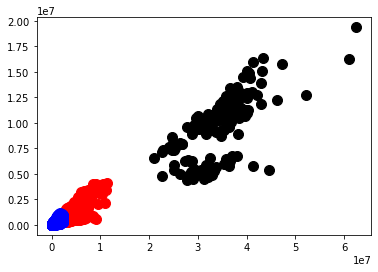

In [7]:
plt.scatter(points[y_km ==0,0], points[y_km == 0,1], s=100, c='red')
plt.scatter(points[y_km ==1,0], points[y_km == 1,1], s=100, c='black')
plt.scatter(points[y_km ==2,0], points[y_km == 2,1], s=100, c='blue')
plt.scatter(points[y_km ==3,0], points[y_km == 3,1], s=100, c='cyan')

In [8]:
import scipy.cluster.hierarchy as sch
dendrogram_p = points[0:25]

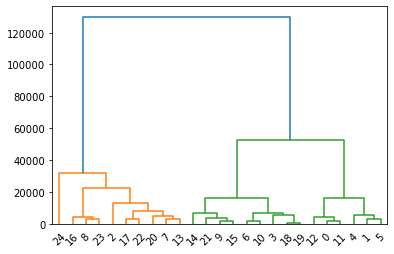

In [9]:
dendrogram = sch.dendrogram(sch.linkage(dendrogram_p, method='ward'))

# Conclusion
Here we see an algorihtm for K-means clustering. Please Try out some different columns as your excercise :)